In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

In [2]:
def pca_svd(X, n_components):
    X_centered = X - np.mean(X, axis=0)

    U, S, Vt = np.linalg.svd(X_centered)

    principal_components = Vt[:n_components]

    X_reduced = X_centered @ principal_components.T

    return X_reduced, principal_components


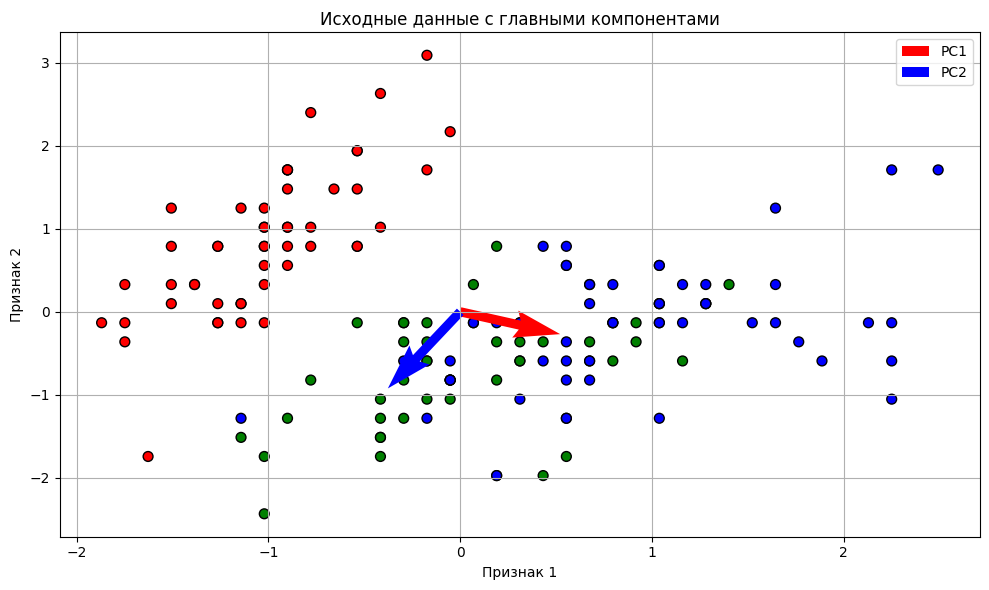

In [5]:
cmap = ListedColormap(['red', 'green', 'blue'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])

X, y = load_iris(return_X_y=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 2
X_reduced, principal_components = pca_svd(X_scaled, n_components)

plt.figure(figsize=(10, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap, edgecolor='k', s=50)
plt.quiver(
    np.mean(X_scaled[:, 0]), np.mean(X_scaled[:, 1]),
    principal_components[0, 0], principal_components[0, 1],
    angles='xy', scale_units='xy', scale=1, color='r', width=0.01, label='PC1'
)
plt.quiver(
    np.mean(X_scaled[:, 0]), np.mean(X_scaled[:, 1]),
    principal_components[1, 0], principal_components[1, 1],
    angles='xy', scale_units='xy', scale=1, color='b', width=0.01, label='PC2'
)
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Исходные данные с главными компонентами")
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()